In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('mendota_secchi_depth.txt', delimiter='\t')
x = df['day_of_year']
y = df['secchi_depth']

In [2]:
#shape into 1 column and n rows
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1,1)


In [3]:
def kernel(X_test, X, sigma):
    n,p = X_test.shape
    K = np.exp(
        -np.sum(
            (X - X_test.reshape(n, 1, p)) ** 2,
            axis = 2
        ) / (2 * sigma ** 2)
    )
    
    return K
    

In [4]:
def getAlpha(K, y):
    lam = 0.4
    n1, p1 = K.shape
    
    alpha = np.linalg.inv(K+lam*np.eye(n1,p1))@y
    
    return alpha

In [27]:
x_test = np.arange(40, 350).reshape(-1,1)

K = kernel(x, x, 10)
alpha = getAlpha(K, y)
K1 = kernel(x, x_test, 10)
yhat = alpha.T @ K1
yhat = yhat.T

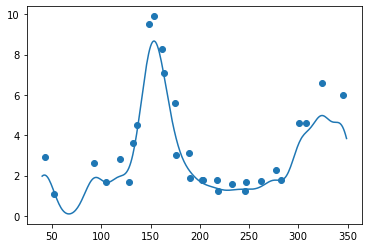

In [30]:
plt.scatter(x,y)
plt.plot(x_test, yhat)

Lambda of .4 provides the best fit

#2b You can iterate through the lambdas and the sigma values, computing the error and then deciding which combination produces the least error